In [1]:

######## snakemake preamble start (automatically inserted, do not edit) ########
import sys; sys.path.extend(['/fh/fast/bloom_j/software/miniconda3/envs/barcoded_flu_pdmH1N1/lib/python3.8/site-packages', '/fh/fast/bloom_j/computational_notebooks/dbacsik/2019/flu_pdmH1N1_barcode_hashing/notebooks']); import pickle; snakemake = pickle.loads(b"\x80\x04\x95F\x1d\x00\x00\x00\x00\x00\x00\x8c\x10snakemake.script\x94\x8c\tSnakemake\x94\x93\x94)\x81\x94}\x94(\x8c\x05input\x94\x8c\x0csnakemake.io\x94\x8c\nInputFiles\x94\x93\x94)\x81\x94\x8c>results/pacbio/scProgenyProduction_trial3_UMI_mutations.csv.gz\x94a}\x94(\x8c\x06_names\x94}\x94\x8c\x11UMI_mutations_csv\x94K\x00N\x86\x94s\x8c\x12_allowed_overrides\x94]\x94(\x8c\x05index\x94\x8c\x04sort\x94eh\x12\x8c\tfunctools\x94\x8c\x07partial\x94\x93\x94h\x06\x8c\x19Namedlist._used_attribute\x94\x93\x94\x85\x94R\x94(h\x18)}\x94\x8c\x05_name\x94h\x12sNt\x94bh\x13h\x16h\x18\x85\x94R\x94(h\x18)}\x94h\x1ch\x13sNt\x94bh\x0eh\nub\x8c\x06output\x94h\x06\x8c\x0bOutputFiles\x94\x93\x94)\x81\x94\x8c>results/pacbio/scProgenyProduction_trial3_consensus_UMI.csv.gz\x94a}\x94(h\x0c}\x94\x8c\x11consensus_UMI_csv\x94K\x00N\x86\x94sh\x10]\x94(h\x12h\x13eh\x12h\x16h\x18\x85\x94R\x94(h\x18)}\x94h\x1ch\x12sNt\x94bh\x13h\x16h\x18\x85\x94R\x94(h\x18)}\x94h\x1ch\x13sNt\x94bh)h&ub\x8c\x06params\x94h\x06\x8c\x06Params\x94\x93\x94)\x81\x94}\x94(h\x0c}\x94h\x10]\x94(h\x12h\x13eh\x12h\x16h\x18\x85\x94R\x94(h\x18)}\x94h\x1ch\x12sNt\x94bh\x13h\x16h\x18\x85\x94R\x94(h\x18)}\x94h\x1ch\x13sNt\x94bub\x8c\twildcards\x94h\x06\x8c\tWildcards\x94\x93\x94)\x81\x94\x8c\x1ascProgenyProduction_trial3\x94a}\x94(h\x0c}\x94\x8c\x04expt\x94K\x00N\x86\x94sh\x10]\x94(h\x12h\x13eh\x12h\x16h\x18\x85\x94R\x94(h\x18)}\x94h\x1ch\x12sNt\x94bh\x13h\x16h\x18\x85\x94R\x94(h\x18)}\x94h\x1ch\x13sNt\x94b\x8c\x04expt\x94hGub\x8c\x07threads\x94K\x01\x8c\tresources\x94h\x06\x8c\tResources\x94\x93\x94)\x81\x94(K\x01K\x01e}\x94(h\x0c}\x94(\x8c\x06_cores\x94K\x00N\x86\x94\x8c\x06_nodes\x94K\x01N\x86\x94uh\x10]\x94(h\x12h\x13eh\x12h\x16h\x18\x85\x94R\x94(h\x18)}\x94h\x1ch\x12sNt\x94bh\x13h\x16h\x18\x85\x94R\x94(h\x18)}\x94h\x1ch\x13sNt\x94bh]K\x01h_K\x01ub\x8c\x03log\x94h\x06\x8c\x03Log\x94\x93\x94)\x81\x94\x8cBresults/logs/pacbio_consensus_UMI_scProgenyProduction_trial3.ipynb\x94a}\x94(h\x0c}\x94\x8c\x08notebook\x94K\x00N\x86\x94sh\x10]\x94(h\x12h\x13eh\x12h\x16h\x18\x85\x94R\x94(h\x18)}\x94h\x1ch\x12sNt\x94bh\x13h\x16h\x18\x85\x94R\x94(h\x18)}\x94h\x1ch\x13sNt\x94bhqhnub\x8c\x06config\x94}\x94(\x8c\x08max_cpus\x94K\x10\x8c\x07log_dir\x94\x8c\x0cresults/logs\x94\x8c\x0cfastq10x_dir\x94\x8c\x10results/fastq10x\x94\x8c\npacbio_dir\x94\x8c\x0eresults/pacbio\x94\x8c\x0emkfastq10x_dir\x94\x8c\x1fresults/fastq10x/mkfastq_output\x94\x8c\ngenome_dir\x94\x8c\x0fresults/genomes\x94\x8c\trefgenome\x94\x8c\x19results/genomes/refgenome\x94\x8c\x14aligned_fastq10x_dir\x94\x8c\x18results/aligned_fastq10x\x94\x8c\x12viral_fastq10x_dir\x94\x8c\x16results/viral_fastq10x\x94\x8c\x1bviral_tags_bcs_in_cells_dir\x94\x8c\x1fresults/viral_tags_bcs_in_cells\x94\x8c\x11viral_progeny_dir\x94\x8c\x15results/viral_progeny\x94\x8c\x13align_and_parse_dir\x94\x8c#results/pacbio/CA09_align_and_parse\x94\x8c\x0fcell_genome_ftp\x94\x8cmftp://ftp.ensembl.org/pub/release-98/fasta/canis_familiaris/dna/Canis_familiaris.CanFam3.1.dna.toplevel.fa.gz\x94\x8c\x0ccell_gtf_ftp\x94\x8c^ftp://ftp.ensembl.org/pub/release-98/gtf/canis_familiaris/Canis_familiaris.CanFam3.1.98.gtf.gz\x94\x8c\x0cviral_genome\x94\x8c!data/flu_sequences/flu-CA09.fasta\x94\x8c\tviral_gtf\x94\x8c\x1fdata/flu_sequences/flu-CA09.gtf\x94\x8c\rviral_genbank\x94\x8c\x1edata/flu_sequences/flu-CA09.gb\x94\x8c\x14viral_tag_identities\x94\x8c+data/flu_sequences/flu-CA09_viral_tags.yaml\x94\x8c\x0fviral_amplicons\x94\x8c.data/flu_sequences/pacbio_amplicons/fluCA09.gb\x94\x8c\x11amplicon_features\x94\x8c9data/flu_sequences/pacbio_amplicons/fluCA09_features.yaml\x94\x8c\x1eamplicon_linearization_primers\x94\x8c=data/flu_sequences/pacbio_amplicons/linearization_primers.tsv\x94\x8c\x15amplicon_to_reference\x94\x8c=data/flu_sequences/pacbio_amplicons/amplicon_to_reference.csv\x94\x8c\x0escoreGapNoncan\x94J\xfc\xff\xff\xff\x8c\x0cscoreGapGCAG\x94J\xfc\xff\xff\xff\x8c\x0cscoreGapATAC\x94J\xfc\xff\xff\xff\x8c\x14cb_whitelist_10x_url\x94\x8ckhttps://github.com/10XGenomics/cellranger/raw/master/lib/python/cellranger/barcodes/3M-february-2018.txt.gz\x94\x8c\x10cb_whitelist_10x\x94\x8c-results/aligned_fastq10x/cb_whitelist_10x.txt\x94\x8c\ncb_len_10x\x94K\x10\x8c\x0bumi_len_10x\x94K\x0c\x8c\x14total_UMI_deviations\x94G@\x04\x00\x00\x00\x00\x00\x00\x8c\x13infection_threshold\x94G?\x84z\xe1G\xae\x14{\x8c\rviral_tag_fdr\x94G?\x1a6\xe2\xeb\x1cC-\x8c\x1dviral_barcode_upstream_length\x94K\x1c\x8c\x16viral_barcode_mismatch\x94K\x00\x8c\x12viral_barcode_minq\x94K\x1e\x8c\x17progeny_detection_limit\x94\x8c\x041e-5\x94\x8c\x0cviral_bc_fdr\x94G?\x1a6\xe2\xeb\x1cC-\x8c\x0eccs_min_length\x94K2\x8c\x0eccs_max_length\x94M\x88\x13\x8c\nccs_min_rq\x94G?\xef\xf7\xce\xd9\x16\x87+\x8c\x0bexperiments\x94}\x94\x8c\x1ascProgenyProduction_trial3\x94}\x94(\x8c\x0bdescription\x94X\x1b\x01\x00\x00Single-cell transcriptomics performed on even lower MOI-infected sample. Innoculum volumes based on `scProgenyProduction_trial1` and `scProgenyProduction_trial2` data. Loaded all collected cells from two 24-well wells, each infected with either wildtype or dblySn viral tag variants.\x94\x8c\tlab_notes\x94\x8c0https://benchling.com/s/etr-N4laiIAy3AUePJdig7wR\x94\x8c\rexpect_ncells\x94M\x10'\x8c\x0ftranscriptomics\x94}\x94(\x8c\x08datetime\x94\x8c\x04date\x94\x93\x94C\x04\x07\xe5\x03\x0c\x94\x85\x94R\x94}\x94(\x8c\x05index\x94\x8c\x08SI-TT-A3\x94\x8c\nbcl_folder\x94\x8c_/shared/ngs/illumina/bloom_lab/210312_D00300_1192_BHKHNYBCX3/raw/210312_D00300_1192_BHKHNYBCX3/\x94\x8c\x04lane\x94K\x01\x8c\x10index_sequencing\x94\x8c\x06single\x94uh\xcbC\x04\x07\xe5\x04\t\x94\x85\x94R\x94}\x94(\x8c\x05index\x94\x8c\x08SI-TT-A3\x94\x8c\nbcl_folder\x94\x8c_/shared/ngs/illumina/bloom_lab/210409_D00300_1210_BHKC7KBCX3/raw/210409_D00300_1210_BHKC7KBCX3/\x94\x8c\x04lane\x94\x8c\x01*\x94\x8c\x10index_sequencing\x94\x8c\x06single\x94uh\xcbC\x04\x07\xe5\x08\x19\x94\x85\x94R\x94}\x94(\x8c\x05index\x94\x8c\x08SI-TT-A3\x94\x8c\nbcl_folder\x94\x8c_/shared/ngs/illumina/bloom_lab/210825_D00300_1310_BHMH5TBCX3/raw/210825_D00300_1310_BHMH5TBCX3/\x94\x8c\x04lane\x94h\xe0\x8c\x10index_sequencing\x94\x8c\x04none\x94uh\xcbC\x04\x07\xe5\t\x0f\x94\x85\x94R\x94}\x94(\x8c\x05index\x94\x8c\x08SI-TT-A3\x94\x8c\nbcl_folder\x94\x8cY/shared/ngs/illumina/bloom_lab/210915_VH00699_2_AAAMCL7M5/raw/210915_VH00699_2_AAAMCL7M5/\x94\x8c\x04lane\x94h\xe0\x8c\x10index_sequencing\x94\x8c\x04none\x94uu\x8c\x17pacbio_viral_sequencing\x94}\x94\x8c\x1c2021-08-05_all_segments_run1\x94\x8cp/fh/fast/bloom_j/SR/ngs/pacbio/210730_SequelIIe/r64272e_20210730_182729/1_A01/m64272e_210730_193026.subreads.bam\x94s\x8c\x0eviral_barcodes\x94}\x94(\x8c\x0bsupernatant\x94}\x94(\x8c\x02wt\x94}\x94(\x8c\x05fluHA\x94}\x94(\x8c\x0breplicate_1\x94}\x94h\xcbC\x04\x07\xe5\x04\x08\x94\x85\x94R\x94\x8c\x90/shared/ngs/illumina/bloom_lab/210408_M04866_0464_000000000-JL5M4_new-demux/Data/Intensities/BaseCalls/WT-sup-fluHA-rep1_S9_L001_R1_001.fastq.gz\x94s\x8c\x0breplicate_2\x94}\x94h\xcbC\x04\x07\xe5\x04\x08\x94\x85\x94R\x94\x8c\x91/shared/ngs/illumina/bloom_lab/210408_M04866_0464_000000000-JL5M4_new-demux/Data/Intensities/BaseCalls/WT-sup-fluHA-rep2_S13_L001_R1_001.fastq.gz\x94su\x8c\x05fluNA\x94}\x94(\x8c\x0breplicate_1\x94}\x94h\xcbC\x04\x07\xe5\x04\x08\x94\x85\x94R\x94\x8c\x90/shared/ngs/illumina/bloom_lab/210408_M04866_0464_000000000-JL5M4_new-demux/Data/Intensities/BaseCalls/WT-sup-fluNA-rep1_S1_L001_R1_001.fastq.gz\x94s\x8c\x0breplicate_2\x94}\x94h\xcbC\x04\x07\xe5\x05\x11\x94\x85\x94R\x94\x8c\x86/shared/ngs/illumina/bloom_lab/210517_M03100_0681_000000000-JL4TM/Data/Intensities/BaseCalls/WT-sup-fluNA-rep2_S1_L001_R1_001.fastq.gz\x94suu\x8c\x03syn\x94}\x94(\x8c\x05fluHA\x94}\x94(\x8c\x0breplicate_1\x94}\x94h\xcbC\x04\x07\xe5\x04\x08\x94\x85\x94R\x94\x8c\x95/shared/ngs/illumina/bloom_lab/210408_M04866_0464_000000000-JL5M4_new-demux/Data/Intensities/BaseCalls/dblSyn-sup-fluHA-rep1_S10_L001_R1_001.fastq.gz\x94s\x8c\x0breplicate_2\x94}\x94h\xcbC\x04\x07\xe5\x04\x08\x94\x85\x94R\x94\x8c\x95/shared/ngs/illumina/bloom_lab/210408_M04866_0464_000000000-JL5M4_new-demux/Data/Intensities/BaseCalls/dblSyn-sup-fluHA-rep2_S14_L001_R1_001.fastq.gz\x94su\x8c\x05fluNA\x94}\x94(\x8c\x0breplicate_1\x94}\x94h\xcbC\x04\x07\xe5\x04\x08\x94\x85\x94R\x94\x8c\x94/shared/ngs/illumina/bloom_lab/210408_M04866_0464_000000000-JL5M4_new-demux/Data/Intensities/BaseCalls/dblSyn-sup-fluNA-rep1_S2_L001_R1_001.fastq.gz\x94s\x8c\x0breplicate_2\x94}\x94h\xcbC\x04\x07\xe5\x04\x08\x94\x85\x94R\x94\x8c\x94/shared/ngs/illumina/bloom_lab/210408_M04866_0464_000000000-JL5M4_new-demux/Data/Intensities/BaseCalls/dblSyn-sup-fluNA-rep2_S6_L001_R1_001.fastq.gz\x94suuu\x8c\x10second_infection\x94}\x94(\x8c\x02wt\x94}\x94(\x8c\x05fluHA\x94}\x94(\x8c\x0breplicate_1\x94}\x94h\xcbC\x04\x07\xe5\x05\x11\x94\x85\x94R\x94\x8c\x85/shared/ngs/illumina/bloom_lab/210517_M03100_0681_000000000-JL4TM/Data/Intensities/BaseCalls/WT-SI-fluHA-rep1_S2_L001_R1_001.fastq.gz\x94s\x8c\x0breplicate_2\x94}\x94h\xcbC\x04\x07\xe5\x05\x11\x94\x85\x94R\x94\x8c\x85/shared/ngs/illumina/bloom_lab/210517_M03100_0681_000000000-JL4TM/Data/Intensities/BaseCalls/WT-SI-fluHA-rep2_S3_L001_R1_001.fastq.gz\x94su\x8c\x05fluNA\x94}\x94(\x8c\x0breplicate_1\x94}\x94h\xcbC\x04\x07\xe5\x05\x11\x94\x85\x94R\x94\x8c\x86/shared/ngs/illumina/bloom_lab/210517_M03100_0681_000000000-JL4TM/Data/Intensities/BaseCalls/WT-SI-fluNA-rep1_S11_L001_R1_001.fastq.gz\x94s\x8c\x0breplicate_2\x94}\x94h\xcbC\x04\x07\xe5\x05\x11\x94\x85\x94R\x94\x8c\x86/shared/ngs/illumina/bloom_lab/210517_M03100_0681_000000000-JL4TM/Data/Intensities/BaseCalls/WT-SI-fluNA-rep2_S12_L001_R1_001.fastq.gz\x94suu\x8c\x03syn\x94}\x94(\x8c\x05fluHA\x94}\x94(\x8c\x0breplicate_1\x94}\x94h\xcbC\x04\x07\xe5\x05\x11\x94\x85\x94R\x94\x8c\x89/shared/ngs/illumina/bloom_lab/210517_M03100_0681_000000000-JL4TM/Data/Intensities/BaseCalls/dblSyn-SI-fluHA-rep1_S4_L001_R1_001.fastq.gz\x94s\x8c\x0breplicate_2\x94}\x94h\xcbC\x04\x07\xe5\x05\x11\x94\x85\x94R\x94\x8c\x89/shared/ngs/illumina/bloom_lab/210517_M03100_0681_000000000-JL4TM/Data/Intensities/BaseCalls/dblSyn-SI-fluHA-rep2_S5_L001_R1_001.fastq.gz\x94su\x8c\x05fluNA\x94}\x94(\x8c\x0breplicate_1\x94}\x94h\xcbC\x04\x07\xe5\x05\x11\x94\x85\x94R\x94\x8c\x8a/shared/ngs/illumina/bloom_lab/210517_M03100_0681_000000000-JL4TM/Data/Intensities/BaseCalls/dblSyn-SI-fluNA-rep1_S13_L001_R1_001.fastq.gz\x94s\x8c\x0breplicate_2\x94}\x94h\xcbC\x04\x07\xe5\x05\x11\x94\x85\x94R\x94\x8c\x8a/shared/ngs/illumina/bloom_lab/210517_M03100_0681_000000000-JL4TM/Data/Intensities/BaseCalls/dblSyn-SI-fluNA-rep2_S14_L001_R1_001.fastq.gz\x94suuuuusu\x8c\x04rule\x94\x8c\x14pacbio_consensus_UMI\x94\x8c\x0fbench_iteration\x94N\x8c\tscriptdir\x94\x8c[/fh/fast/bloom_j/computational_notebooks/dbacsik/2019/flu_pdmH1N1_barcode_hashing/notebooks\x94ub."); from snakemake.logging import logger; logger.printshellcmds = False; import os; os.chdir('/fh/fast/bloom_j/computational_notebooks/dbacsik/2019/flu_pdmH1N1_barcode_hashing');
######## snakemake preamble end #########


# Pacbio consensus UMI
This notebook calls consensus muations on PacBio data grouped by by cell_barcode, gene, and UMI. Then, it exports a processed CSV with the following columns:
* cell_barcode
* gene
* UMI
* mutation
* mutation_CCS

In [2]:
from IPython.display import display

from dms_variants.constants import CBPALETTE

import pandas as pd

import plotnine as p9

In [3]:
UMI_mutations_csv = snakemake.input.UMI_mutations_csv
expt = snakemake.wildcards.expt
consensus_UMI_csv = snakemake.output.consensus_UMI_csv

Style parameters:

In [4]:
p9.theme_set(p9.theme_classic())

## Load Data

In [5]:
UMI_mutations = pd.read_csv(UMI_mutations_csv)
display(UMI_mutations)

,cell_barcode,gene,UMI,mutations,query_name
0,TATTTCGGTGCCTAAT,fluHA,TGGGCGTGAATA,NaN,m64272e_210730_193026/322/ccs
1,TATTTCGGTGCCTAAT,fluHA,ACACGTCCTTGA,NaN,m64272e_210730_193026/620/ccs
2,TGATTTCCATTGCAAC,fluHA,GACGATCTTGGA,T578C,m64272e_210730_193026/1250/ccs
3,GTCGTTCTCGTTTACT,fluHA,ATTCTAGGGGTC,C63T G1907A ins1907CA G1909A,m64272e_210730_193026/2656/ccs
4,GTCATTTGTCTACACA,fluHA,AATAGAAAGATG,ins495CAA del1014to1014,m64272e_210730_193026/2675/ccs
...,...,...,...,...,...
1179473,AACCAACAGGGTCTTT,fluPB2,ATACTAACTCGA,C812T C1636T,m64272e_210730_193026/180553635/ccs
1179474,CGATGGCCAAAGAGTT,fluPB2,CTAACCAGGGGG,NaN,m64272e_210730_193026/180553782/ccs
1179475,GTAGAAACACCTAAAC,fluPB2,ATGGAGCCGTGA,A556G del558to2280,m64272e_210730_193026/180553898/ccs
1179476,GCCATTCAGGTGGCTA,fluPB2,GGATTGATCTTT,del1015to2280,m64272e_210730_193026/180554062/ccs


## Process Data

Split each mutation into its own row:

In [6]:
UMI_mutations['muts_split'] = (UMI_mutations['mutations']
                               .apply(lambda x: str(x).split(' ')))
UMI_mutations = UMI_mutations.explode('muts_split')

display(UMI_mutations)

,cell_barcode,gene,UMI,mutations,query_name,muts_split
0,TATTTCGGTGCCTAAT,fluHA,TGGGCGTGAATA,NaN,m64272e_210730_193026/322/ccs,nan
1,TATTTCGGTGCCTAAT,fluHA,ACACGTCCTTGA,NaN,m64272e_210730_193026/620/ccs,nan
2,TGATTTCCATTGCAAC,fluHA,GACGATCTTGGA,T578C,m64272e_210730_193026/1250/ccs,T578C
3,GTCGTTCTCGTTTACT,fluHA,ATTCTAGGGGTC,C63T G1907A ins1907CA G1909A,m64272e_210730_193026/2656/ccs,C63T
3,GTCGTTCTCGTTTACT,fluHA,ATTCTAGGGGTC,C63T G1907A ins1907CA G1909A,m64272e_210730_193026/2656/ccs,G1907A
...,...,...,...,...,...,...
1179475,GTAGAAACACCTAAAC,fluPB2,ATGGAGCCGTGA,A556G del558to2280,m64272e_210730_193026/180553898/ccs,A556G
1179475,GTAGAAACACCTAAAC,fluPB2,ATGGAGCCGTGA,A556G del558to2280,m64272e_210730_193026/180553898/ccs,del558to2280
1179476,GCCATTCAGGTGGCTA,fluPB2,GGATTGATCTTT,del1015to2280,m64272e_210730_193026/180554062/ccs,del1015to2280
1179477,GTCATTTGTCTACACA,fluPB2,TAAGAACCGAAT,del2221to2280 ins2221TCTAGCATACTTACTGACAGCCAGA...,m64272e_210730_193026/180554193/ccs,del2221to2280


Count total CCS for cell_barcode-gene-UMI and count number of CCS supporting each mutation for cell_barcode-gene-UMI:

In [7]:
mutation_CCS_df = (
    UMI_mutations
    .groupby(['cell_barcode', 'gene', 'UMI', 'muts_split'])
    ['query_name']
    .nunique()
    .reset_index()
    .rename(columns={'query_name': 'mutation_CCS'}))
total_CCS_df = (
    UMI_mutations
    .groupby(['cell_barcode', 'gene', 'UMI'])
    ['query_name']
    .nunique()
    .reset_index()
    .rename(columns={'query_name': 'total_CCS'}))
display(mutation_CCS_df)
display(total_CCS_df)

,cell_barcode,gene,UMI,muts_split,mutation_CCS
0,AAACGAAGTACTTCCC,fluM,AAAAAGACGGAA,nan,1
1,AAACGAAGTACTTCCC,fluM,AAAAATACTACG,A623G,1
2,AAACGAAGTACTTCCC,fluM,AAAAATTAATGC,nan,1
3,AAACGAAGTACTTCCC,fluM,AAAACAAATATA,T451C,1
4,AAACGAAGTACTTCCC,fluM,AAAACAAATATA,del969to980,1
...,...,...,...,...,...
1276793,TTTGGAGGTATCGTTG,fluPB2,TATGATCTAGGG,C1865T,1
1276794,TTTGGAGGTATCGTTG,fluPB2,TATGATCTAGGG,del1126to1755,1
1276795,TTTGGAGGTATCGTTG,fluPB2,TATGATCTAGGG,del17to17,1
1276796,TTTGGAGGTATCGTTG,fluPB2,TATGATCTAGGG,ins504C,1


,cell_barcode,gene,UMI,total_CCS
0,AAACGAAGTACTTCCC,fluM,AAAAAGACGGAA,1
1,AAACGAAGTACTTCCC,fluM,AAAAATACTACG,1
2,AAACGAAGTACTTCCC,fluM,AAAAATTAATGC,1
3,AAACGAAGTACTTCCC,fluM,AAAACAAATATA,1
4,AAACGAAGTACTTCCC,fluM,AAAAGTCGTGGT,1
...,...,...,...,...
549150,TTTGGAGGTATCGTTG,fluPB2,CTATCCGTTCTT,7
549151,TTTGGAGGTATCGTTG,fluPB2,GTGATTCATGAA,1
549152,TTTGGAGGTATCGTTG,fluPB2,TAATCAACAAGG,6
549153,TTTGGAGGTATCGTTG,fluPB2,TAGTTTACACGT,2


Merge into UMI_mutations df:

In [8]:
UMI_mutations = pd.merge(
    left=UMI_mutations,
    right=mutation_CCS_df,
    on=['cell_barcode', 'gene', 'UMI', 'muts_split'],
    how='left',
    validate='many_to_one'
)
UMI_mutations = pd.merge(
    left=UMI_mutations,
    right=total_CCS_df,
    on=['cell_barcode', 'gene', 'UMI'],
    how='left',
    validate='many_to_one'
)
display(UMI_mutations)

,cell_barcode,gene,UMI,mutations,query_name,muts_split,mutation_CCS,total_CCS
0,TATTTCGGTGCCTAAT,fluHA,TGGGCGTGAATA,NaN,m64272e_210730_193026/322/ccs,nan,1,1
1,TATTTCGGTGCCTAAT,fluHA,ACACGTCCTTGA,NaN,m64272e_210730_193026/620/ccs,nan,1,1
2,TGATTTCCATTGCAAC,fluHA,GACGATCTTGGA,T578C,m64272e_210730_193026/1250/ccs,T578C,1,1
3,GTCGTTCTCGTTTACT,fluHA,ATTCTAGGGGTC,C63T G1907A ins1907CA G1909A,m64272e_210730_193026/2656/ccs,C63T,1,1
4,GTCGTTCTCGTTTACT,fluHA,ATTCTAGGGGTC,C63T G1907A ins1907CA G1909A,m64272e_210730_193026/2656/ccs,G1907A,1,1
...,...,...,...,...,...,...,...,...
1804385,GTAGAAACACCTAAAC,fluPB2,ATGGAGCCGTGA,A556G del558to2280,m64272e_210730_193026/180553898/ccs,A556G,2,2
1804386,GTAGAAACACCTAAAC,fluPB2,ATGGAGCCGTGA,A556G del558to2280,m64272e_210730_193026/180553898/ccs,del558to2280,2,2
1804387,GCCATTCAGGTGGCTA,fluPB2,GGATTGATCTTT,del1015to2280,m64272e_210730_193026/180554062/ccs,del1015to2280,3,4
1804388,GTCATTTGTCTACACA,fluPB2,TAAGAACCGAAT,del2221to2280 ins2221TCTAGCATACTTACTGACAGCCAGA...,m64272e_210730_193026/180554193/ccs,del2221to2280,5,13


Calculate fraction of total CCS with mutation:

In [9]:
UMI_mutations['frac_CCS'] = (
    UMI_mutations['mutation_CCS'] /
    UMI_mutations['total_CCS']
)
display(UMI_mutations)

,cell_barcode,gene,UMI,mutations,query_name,muts_split,mutation_CCS,total_CCS,frac_CCS
0,TATTTCGGTGCCTAAT,fluHA,TGGGCGTGAATA,NaN,m64272e_210730_193026/322/ccs,nan,1,1,1.000000
1,TATTTCGGTGCCTAAT,fluHA,ACACGTCCTTGA,NaN,m64272e_210730_193026/620/ccs,nan,1,1,1.000000
2,TGATTTCCATTGCAAC,fluHA,GACGATCTTGGA,T578C,m64272e_210730_193026/1250/ccs,T578C,1,1,1.000000
3,GTCGTTCTCGTTTACT,fluHA,ATTCTAGGGGTC,C63T G1907A ins1907CA G1909A,m64272e_210730_193026/2656/ccs,C63T,1,1,1.000000
4,GTCGTTCTCGTTTACT,fluHA,ATTCTAGGGGTC,C63T G1907A ins1907CA G1909A,m64272e_210730_193026/2656/ccs,G1907A,1,1,1.000000
...,...,...,...,...,...,...,...,...,...
1804385,GTAGAAACACCTAAAC,fluPB2,ATGGAGCCGTGA,A556G del558to2280,m64272e_210730_193026/180553898/ccs,A556G,2,2,1.000000
1804386,GTAGAAACACCTAAAC,fluPB2,ATGGAGCCGTGA,A556G del558to2280,m64272e_210730_193026/180553898/ccs,del558to2280,2,2,1.000000
1804387,GCCATTCAGGTGGCTA,fluPB2,GGATTGATCTTT,del1015to2280,m64272e_210730_193026/180554062/ccs,del1015to2280,3,4,0.750000
1804388,GTCATTTGTCTACACA,fluPB2,TAAGAACCGAAT,del2221to2280 ins2221TCTAGCATACTTACTGACAGCCAGA...,m64272e_210730_193026/180554193/ccs,del2221to2280,5,13,0.384615


## Call consensus
Label consensus mutations if found in >50% of CCS. This corresponds to `frac_CCS > 0.5` in our dataframe.

In [10]:
UMI_mutations['consensus'] = (
    UMI_mutations['frac_CCS'] > 0.5
)
display(UMI_mutations)

,cell_barcode,gene,UMI,mutations,query_name,muts_split,mutation_CCS,total_CCS,frac_CCS,consensus
0,TATTTCGGTGCCTAAT,fluHA,TGGGCGTGAATA,NaN,m64272e_210730_193026/322/ccs,nan,1,1,1.000000,True
1,TATTTCGGTGCCTAAT,fluHA,ACACGTCCTTGA,NaN,m64272e_210730_193026/620/ccs,nan,1,1,1.000000,True
2,TGATTTCCATTGCAAC,fluHA,GACGATCTTGGA,T578C,m64272e_210730_193026/1250/ccs,T578C,1,1,1.000000,True
3,GTCGTTCTCGTTTACT,fluHA,ATTCTAGGGGTC,C63T G1907A ins1907CA G1909A,m64272e_210730_193026/2656/ccs,C63T,1,1,1.000000,True
4,GTCGTTCTCGTTTACT,fluHA,ATTCTAGGGGTC,C63T G1907A ins1907CA G1909A,m64272e_210730_193026/2656/ccs,G1907A,1,1,1.000000,True
...,...,...,...,...,...,...,...,...,...,...
1804385,GTAGAAACACCTAAAC,fluPB2,ATGGAGCCGTGA,A556G del558to2280,m64272e_210730_193026/180553898/ccs,A556G,2,2,1.000000,True
1804386,GTAGAAACACCTAAAC,fluPB2,ATGGAGCCGTGA,A556G del558to2280,m64272e_210730_193026/180553898/ccs,del558to2280,2,2,1.000000,True
1804387,GCCATTCAGGTGGCTA,fluPB2,GGATTGATCTTT,del1015to2280,m64272e_210730_193026/180554062/ccs,del1015to2280,3,4,0.750000,True
1804388,GTCATTTGTCTACACA,fluPB2,TAAGAACCGAAT,del2221to2280 ins2221TCTAGCATACTTACTGACAGCCAGA...,m64272e_210730_193026/180554193/ccs,del2221to2280,5,13,0.384615,False


## Plot outcomes

Plot distribution of total CCS per cell_barcode-gene-UMI:

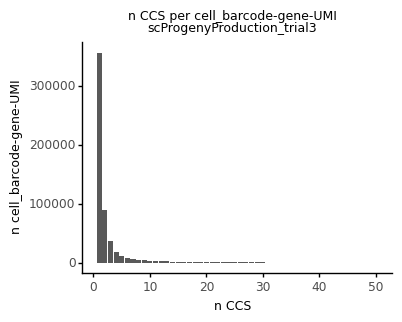

<ggplot: (8773565577066)>

In [11]:
total_CCS_histo = (
    p9.ggplot(
        (UMI_mutations
         [['cell_barcode', 'gene', 'UMI', 'total_CCS']]
         .drop_duplicates()),
         p9.aes(x='total_CCS')) +
    p9.geom_histogram(stat='count') +
    p9.ggtitle('n CCS per cell_barcode-gene-UMI\n'
               f'{expt}') +
    p9.labs(x='n CCS',
            y='n cell_barcode-gene-UMI') +
    p9.theme(figure_size=(4, 3),
             plot_title=p9.element_text(size=9),
             axis_title=p9.element_text(size=9),
             legend_title=p9.element_text(size=9),
             legend_title_align='center'))

display(total_CCS_histo)

Plot distribution of CCS per mutation:

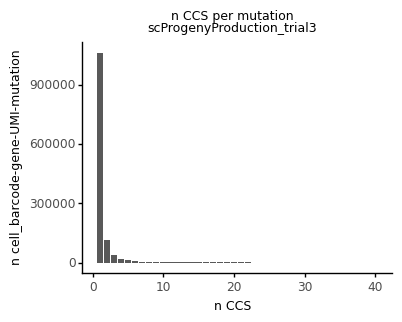

<ggplot: (8773565890542)>

In [12]:
mutation_CCS_histo = (
    p9.ggplot(
        (UMI_mutations
         [['cell_barcode', 'gene', 'UMI', 'muts_split', 'mutation_CCS']]
         .drop_duplicates()),
         p9.aes(x='mutation_CCS')) +
    p9.geom_histogram(stat='count') +
    p9.ggtitle('n CCS per mutation\n'
               f'{expt}') +
    p9.labs(x='n CCS',
            y='n cell_barcode-gene-UMI-mutation') +
    p9.theme(figure_size=(4, 3),
             plot_title=p9.element_text(size=9),
             axis_title=p9.element_text(size=9),
             legend_title=p9.element_text(size=9),
             legend_title_align='center'))

display(mutation_CCS_histo)

Plot relationship between the two:

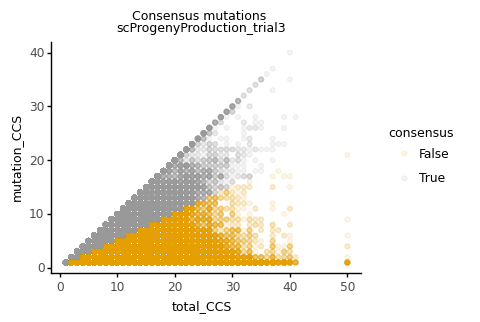

<ggplot: (8773566874064)>

In [13]:
consensus_mutations_scatter = (
    p9.ggplot(
        (UMI_mutations
         [['cell_barcode', 'gene', 'UMI', 'muts_split', 'mutation_CCS', 'total_CCS', 'consensus']]
         .drop_duplicates()),
         p9.aes(x='total_CCS',
                y='mutation_CCS',
                color='consensus')) +
    p9.geom_point(alpha=0.1) +
    p9.ggtitle('Consensus mutations \n'
               f'{expt}') +
    p9.theme(figure_size=(4, 3),
             plot_title=p9.element_text(size=9),
             axis_title=p9.element_text(size=9),
             legend_title=p9.element_text(size=9),
             legend_title_align='center') +
    p9.scale_color_manual([CBPALETTE[1], CBPALETTE[0]]))

display(consensus_mutations_scatter)

In [14]:
output_df = (
    UMI_mutations
    .query('consensus==True')
    [['cell_barcode', 'gene', 'UMI', 'muts_split']]
    .rename(columns={'muts_split': 'mutation'})
)
display(output_df)

print(f'Saving UMI consensus mutations to {consensus_UMI_csv}')
output_df.to_csv(consensus_UMI_csv, index=False)

,cell_barcode,gene,UMI,mutation
0,TATTTCGGTGCCTAAT,fluHA,TGGGCGTGAATA,nan
1,TATTTCGGTGCCTAAT,fluHA,ACACGTCCTTGA,nan
2,TGATTTCCATTGCAAC,fluHA,GACGATCTTGGA,T578C
3,GTCGTTCTCGTTTACT,fluHA,ATTCTAGGGGTC,C63T
4,GTCGTTCTCGTTTACT,fluHA,ATTCTAGGGGTC,G1907A
...,...,...,...,...
1804381,ATTCCATAGTTAGTAG,fluPB2,AAGGAACATTCG,del558to2280
1804384,CGATGGCCAAAGAGTT,fluPB2,CTAACCAGGGGG,nan
1804385,GTAGAAACACCTAAAC,fluPB2,ATGGAGCCGTGA,A556G
1804386,GTAGAAACACCTAAAC,fluPB2,ATGGAGCCGTGA,del558to2280


Saving UMI consensus mutations to results/pacbio/scProgenyProduction_trial3_consensus_UMI.csv.gz
